In [1]:
import pandas as pd
import sys
sys.path.append('../../')
from config import Config
from experiments_utils import *

In [2]:
training_feats_file = Config.TRAIN_PATH + 'SOCC_nyt_ync_features.csv'

In [3]:
training_feats_df = pd.read_csv(training_feats_file)

In [4]:
SOCC_df = training_feats_df[training_feats_df['source'].isin(['SOCC'])]

In [5]:
data_sources = ['SOCC', 
                #'NYTPicks+YNACC', 
                #'SOCC+NYTPicks+YNACC', 
                #'SOCC+NYTPicks'
               ]        

In [6]:
feature_sets = ['text_feats', 
                'length_feats',
                'argumentation_feats',
                'COMMENTIQ_feats',
                'named_entity_feats',
                'constructiveness_chars_feats',
                'non_constructiveness_chars_feats',
                'toxicity_chars_feats'
               ]

In [15]:
print('The best feature combinations: ', find_best_features(SOCC_df, feature_sets))

Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
The best feature combinations:  (('length_feats', 'argumentation_feats', 'COMMENTIQ_feats', 'named_entity_feats', 'constructiveness_chars_feats', 'non_constructiveness_chars_feats'), 0.9361452296785201)


# Find correlation of each feature column with the target column 

In [18]:
SOCC_df.columns

Index(['pp_comment_text', 'constructive', 'source',
       'has_conjunctions_and_connectives', 'has_stance_adverbials',
       'has_reasoning_verbs', 'has_modals', 'has_shell_nouns', 'length',
       'average_word_length', 'readability_score', 'personal_exp_score',
       'named_entity_count', 'nSents', 'avg_words_per_sent', 'specific_points',
       'dialogue', 'no_con', 'evidence', 'personal_story', 'solution',
       'no_respect', 'no_non_con', 'provocative', 'noncon_other', 'sarcastic',
       'non_relevant', 'unsubstantial', 'personal_attack', 'teasing',
       'no_toxic', 'abusive', 'toxic_other', 'embarrassment', 'inflammatory'],
      dtype='object')

In [19]:
features = ['has_conjunctions_and_connectives', 'has_stance_adverbials',
       'has_reasoning_verbs', 'has_modals', 'has_shell_nouns', 'length',
       'average_word_length', 'readability_score', 'personal_exp_score',
       'named_entity_count', 'nSents', 'avg_words_per_sent', 'specific_points',
       'dialogue', 'no_con', 'evidence', 'personal_story', 'solution',
       'no_respect', 'no_non_con', 'provocative', 'noncon_other', 'sarcastic',
       'non_relevant', 'unsubstantial', 'personal_attack', 'teasing',
       'no_toxic', 'abusive', 'toxic_other', 'embarrassment', 'inflammatory']

Feature:  has_conjunctions_and_connectives
Correlation:  0.24669337097866414
-----------------
Feature:  has_stance_adverbials
Correlation:  0.3044504716668109
-----------------
Feature:  has_reasoning_verbs
Correlation:  0.3862482756150016
-----------------
Feature:  has_modals
Correlation:  0.414188038875005
-----------------
Feature:  has_shell_nouns
Correlation:  0.33157941865505
-----------------
Feature:  length
Correlation:  0.6229550807141968
-----------------
Feature:  average_word_length
Correlation:  -0.04114168880753566
-----------------
Feature:  readability_score
Correlation:  0.7219889433538611
-----------------
Feature:  personal_exp_score
Correlation:  -0.02549702732585633
-----------------
Feature:  named_entity_count
Correlation:  0.5289503661720035
-----------------
Feature:  nSents
Correlation:  0.5335967583909184
-----------------
Feature:  avg_words_per_sent
Correlation:  0.35086588420616754
-----------------
Feature:  specific_points
Correlation:  0.430853996580

/home/vkolhatk/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Correlation:  -0.12031180446368409
-----------------
Feature:  noncon_other
Correlation:  nan
-----------------
Feature:  sarcastic
Correlation:  -0.0971409097861506
-----------------
Feature:  non_relevant
Correlation:  -0.4302867674350587
-----------------
Feature:  unsubstantial
Correlation:  -0.46515826624672246
-----------------
Feature:  personal_attack
Correlation:  -0.03275557139520902
-----------------
Feature:  teasing
Correlation:  -0.0426139069128108
-----------------
Feature:  no_toxic
Correlation:  0.03225095655938979
-----------------
Feature:  abusive
Correlation:  -0.03742343791689194
-----------------
Feature:  toxic_other
Correlation:  nan
-----------------
Feature:  embarrassment
Correlation:  -0.008898645524256886
-----------------
Feature:  inflammatory
Correlation:  -0.010749803760354788
-----------------


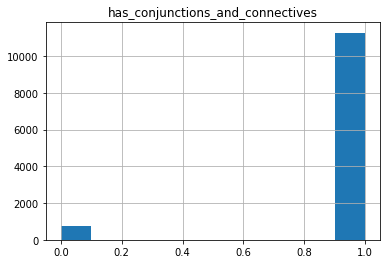

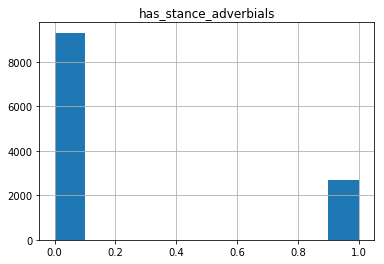

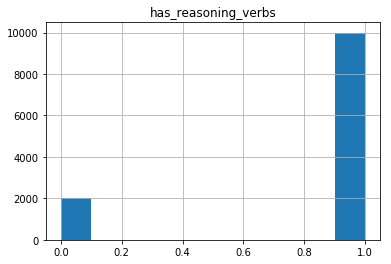

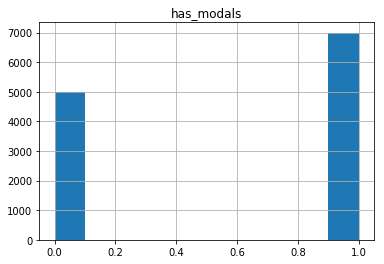

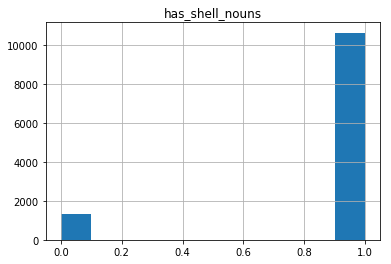

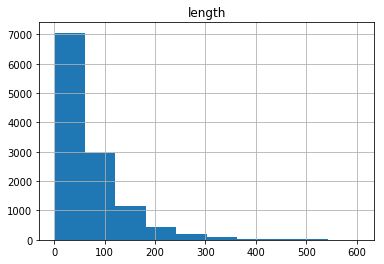

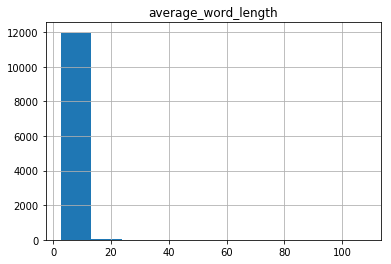

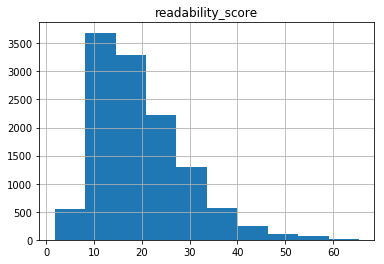

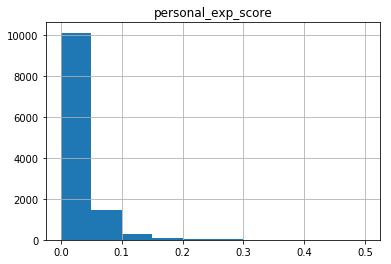

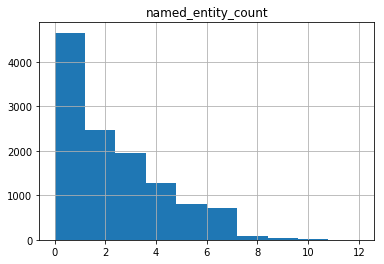

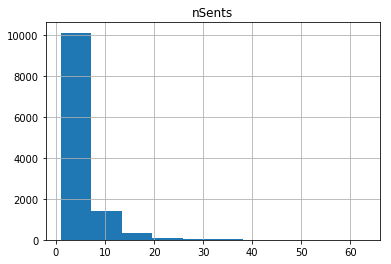

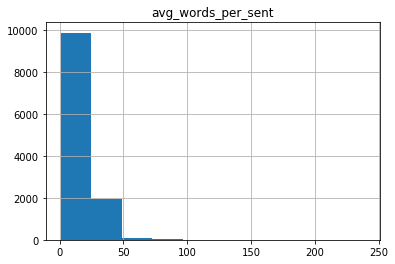

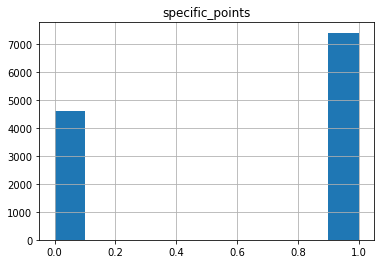

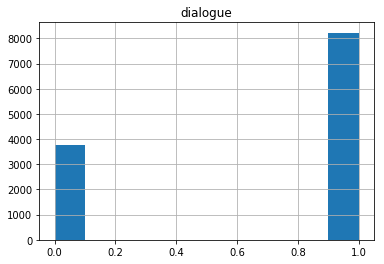

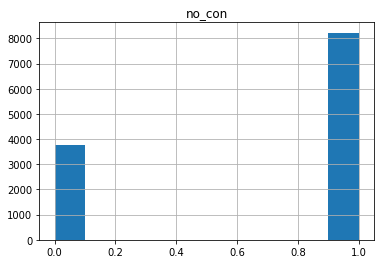

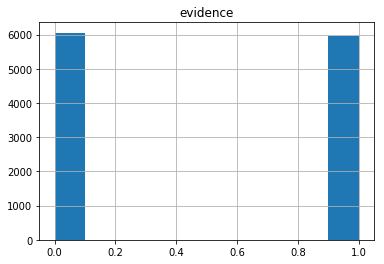

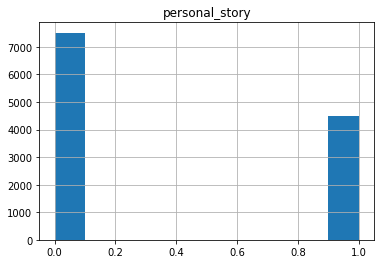

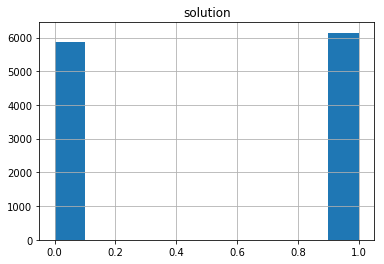

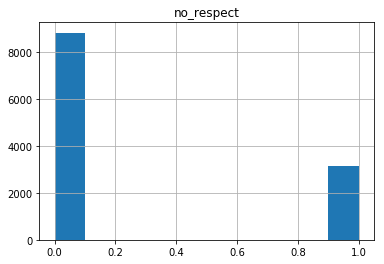

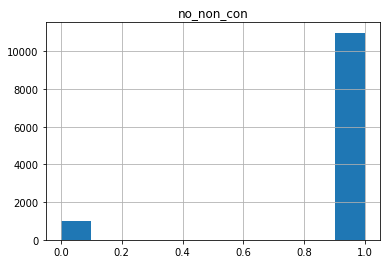

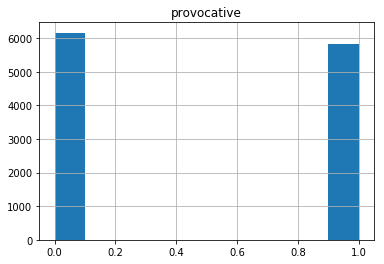

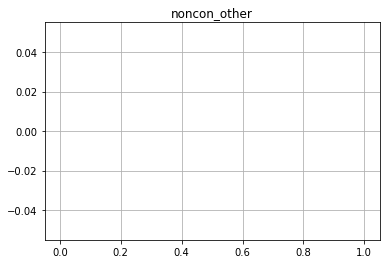

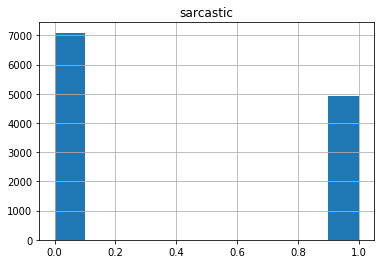

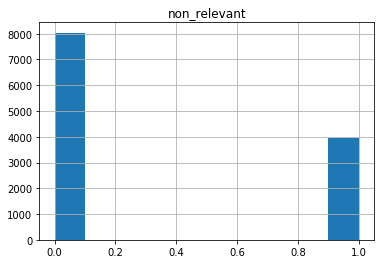

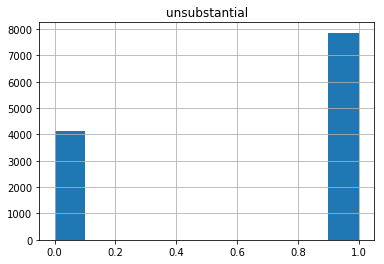

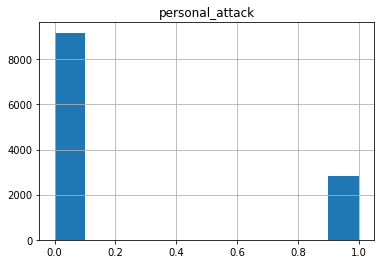

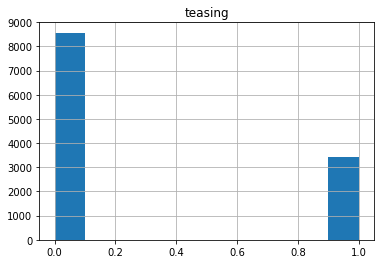

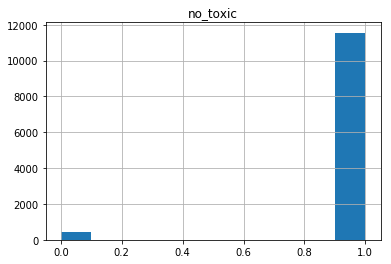

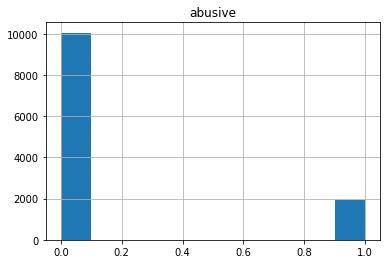

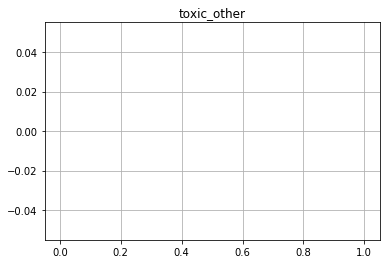

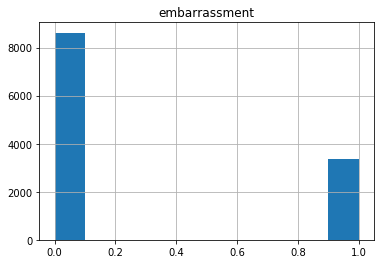

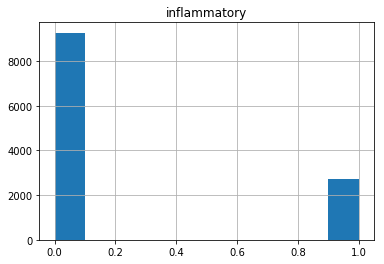

In [21]:
for feat in features: 
    print('Feature: ', feat)
    SOCC_df.hist(feat)
    print('Correlation: ', SOCC_df['constructive'].corr(SOCC_df[feat]))
    print('-----------------')

In [23]:
#SOCC_df.corr(method='pearson')

Feature set:  text_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.75234131, 0.74479167, 0.76145833, 0.73125   , 0.746875  ,
       0.74791667, 0.73125   , 0.75104167, 0.74375   , 0.73826903]), 'variance': 7.98221165213992e-05, 'mean_score': 0.7448943674707401}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


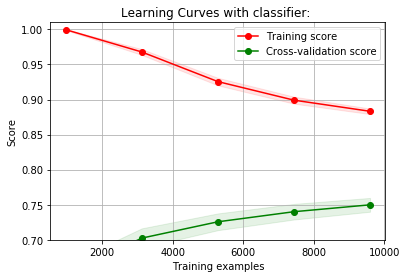


----------------------------

Feature set:  length_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.93548387, 0.90833333, 0.915625  , 0.92291667, 0.91041667,
       0.91666667, 0.92083333, 0.91875   , 0.92916667, 0.90615224]), 'variance': 7.599958192748591e-05, 'mean_score': 0.9184344446219741}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


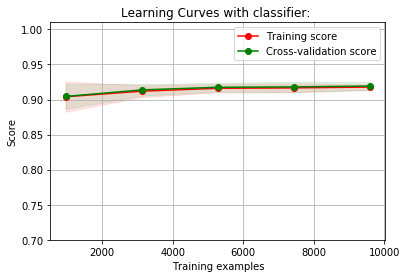


----------------------------

Feature set:  argumentation_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.76690947, 0.75833333, 0.76145833, 0.75416667, 0.76770833,
       0.74583333, 0.74791667, 0.74791667, 0.74583333, 0.73618352]), 'variance': 9.478433833797803e-05, 'mean_score': 0.7532259660474169}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


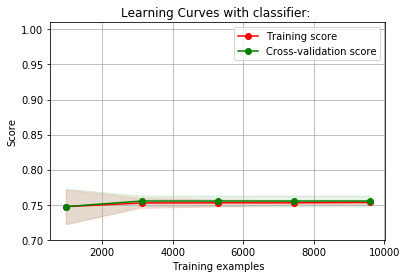


----------------------------

Feature set:  COMMENTIQ_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.91155047, 0.88958333, 0.89583333, 0.91458333, 0.896875  ,
       0.903125  , 0.89479167, 0.89375   , 0.89791667, 0.89885297]), 'variance': 5.623465746256691e-05, 'mean_score': 0.8996861773441232}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


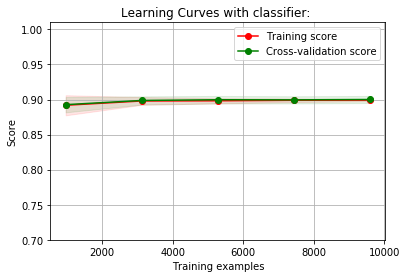


----------------------------

Feature set:  named_entity_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.75234131, 0.75625   , 0.76041667, 0.74270833, 0.746875  ,
       0.73958333, 0.72708333, 0.73125   , 0.76041667, 0.75078206]), 'variance': 0.00012060611715700005, 'mean_score': 0.7467706709118247}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


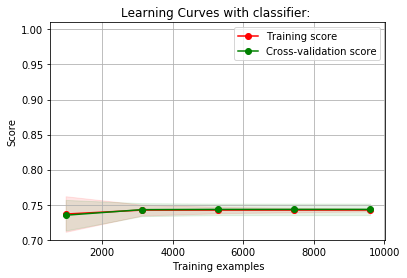


----------------------------

Feature set:  constructiveness_chars_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.86784599, 0.834375  , 0.84895833, 0.86666667, 0.86354167,
       0.85833333, 0.81666667, 0.84895833, 0.85208333, 0.83315954]), 'variance': 0.0002485584717214281, 'mean_score': 0.8490588868278575}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


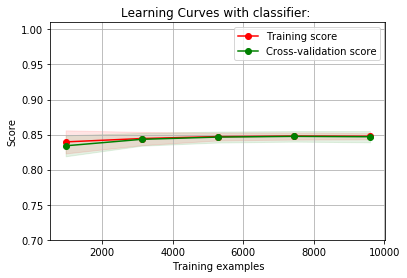


----------------------------

Feature set:  non_constructiveness_chars_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.75026015, 0.73645833, 0.72708333, 0.73020833, 0.75833333,
       0.74791667, 0.77916667, 0.74375   , 0.76354167, 0.7101147 ]), 'variance': 0.0003555412371292848, 'mean_score': 0.7446833181830348}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


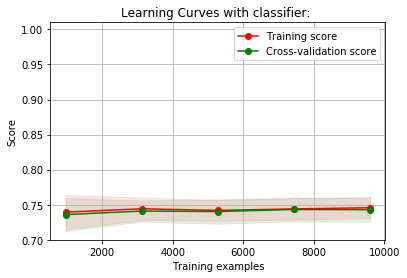


----------------------------

Feature set:  toxicity_chars_feats
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
Cross-validation results:  {'scores': array([0.4880333 , 0.48125   , 0.49583333, 0.50833333, 0.46875   ,
       0.49479167, 0.49479167, 0.51979167, 0.51979167, 0.49426486]), 'variance': 0.00023105785079511205, 'mean_score': 0.49656314912089383}
Size of the training data:  12000 	Concstructive ( 5906 ) 	Non concstructive ( 6094 )
plot learning cures:  
Show the plots


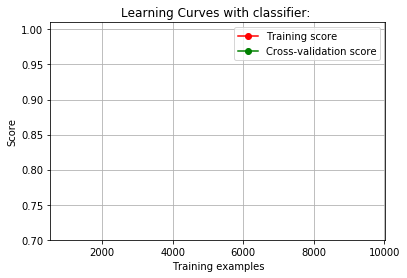


----------------------------



In [8]:
for feature_set in feature_sets:
    print('Feature set: ', feature_set) 
    print('Cross-validation results: ', run_cross_validation_experiments(SOCC_df, [feature_set]))
    #save_path = data_source + '.png'
    run_training_size_experiments(SOCC_df, [feature_set])
    print('\n----------------------------\n')          